In [56]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [57]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [58]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [59]:
weather.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2011-11-01 01:00:00,0,2011-11-01 01:00:00,51.8,88.0,55.4,6.9
2011-11-01 02:00:00,1,2011-11-01 02:00:00,53.6,94.0,55.4,8.1
2011-11-01 03:00:00,2,2011-11-01 03:00:00,53.6,88.0,57.2,9.2
2011-11-01 04:00:00,3,2011-11-01 04:00:00,53.6,88.0,57.2,9.2
2011-11-01 05:00:00,4,2011-11-01 05:00:00,53.6,88.0,57.2,8.1


In [60]:
# slicing out 2013 data
weather2013 = weather[weather.index.year == 2013]
weather2012 = weather[weather.index.year == 2012]
weather1213 = pd.concat([weather2012, weather2013])

In [61]:
weather1213.head()

,Unnamed: 0,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH
2012-01-01 00:00:00,1460,2012-01-01 00:00:00,50.0,88.0,53.6,13.8
2012-01-01 01:00:00,1461,2012-01-01 01:00:00,50.0,88.0,53.6,15.0
2012-01-01 02:00:00,1462,2012-01-01 02:00:00,51.8,94.0,53.6,13.8
2012-01-01 03:00:00,1463,2012-01-01 03:00:00,51.0,92.0,53.0,13.8
2012-01-01 04:00:00,1464,2012-01-01 04:00:00,50.0,88.0,53.6,10.4


In [62]:
energy2013 = pd.read_csv('../Final_Data/energy_final_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy2013.iloc[:,1:].convert_objects(convert_numeric=True)
energy2013.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [63]:
energy2012 = pd.read_csv('../Final_Data/energy_final_2012.csv', parse_dates=[0], infer_datetime_format=True)
energy2012.iloc[:,1:].convert_objects(convert_numeric=True)
energy2012.columns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [64]:
energy1213 = pd.concat([energy2012, energy2013])
energy1213.head()

,Unnamed: 0,DateTime,Adversity,Affluent,Comfortable,Overall
0,0,2012-01-01 00:00:00,0.221192,0.268072,0.190114,0.231749
1,1,2012-01-01 01:00:00,0.616456,0.633311,0.355447,0.550101
2,2,2012-01-01 02:00:00,0.483976,0.570036,0.296605,0.466764
3,3,2012-01-01 03:00:00,0.375616,0.489018,0.236228,0.383123
4,4,2012-01-01 04:00:00,0.324936,0.376808,0.206053,0.312892


In [65]:
energy1213.index = pd.DatetimeIndex(energy1213.DateTime)

In [66]:
energy1213.drop(['Unnamed: 0'], axis=1, inplace=True)

In [67]:
energy1213.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [68]:
energy1213.head()

,Datetime,Low_Income,High_Income,Middle_Income,Overall
2012-01-01 00:00:00,2012-01-01 00:00:00,0.221192,0.268072,0.190114,0.231749
2012-01-01 01:00:00,2012-01-01 01:00:00,0.616456,0.633311,0.355447,0.550101
2012-01-01 02:00:00,2012-01-01 02:00:00,0.483976,0.570036,0.296605,0.466764
2012-01-01 03:00:00,2012-01-01 03:00:00,0.375616,0.489018,0.236228,0.383123
2012-01-01 04:00:00,2012-01-01 04:00:00,0.324936,0.376808,0.206053,0.312892


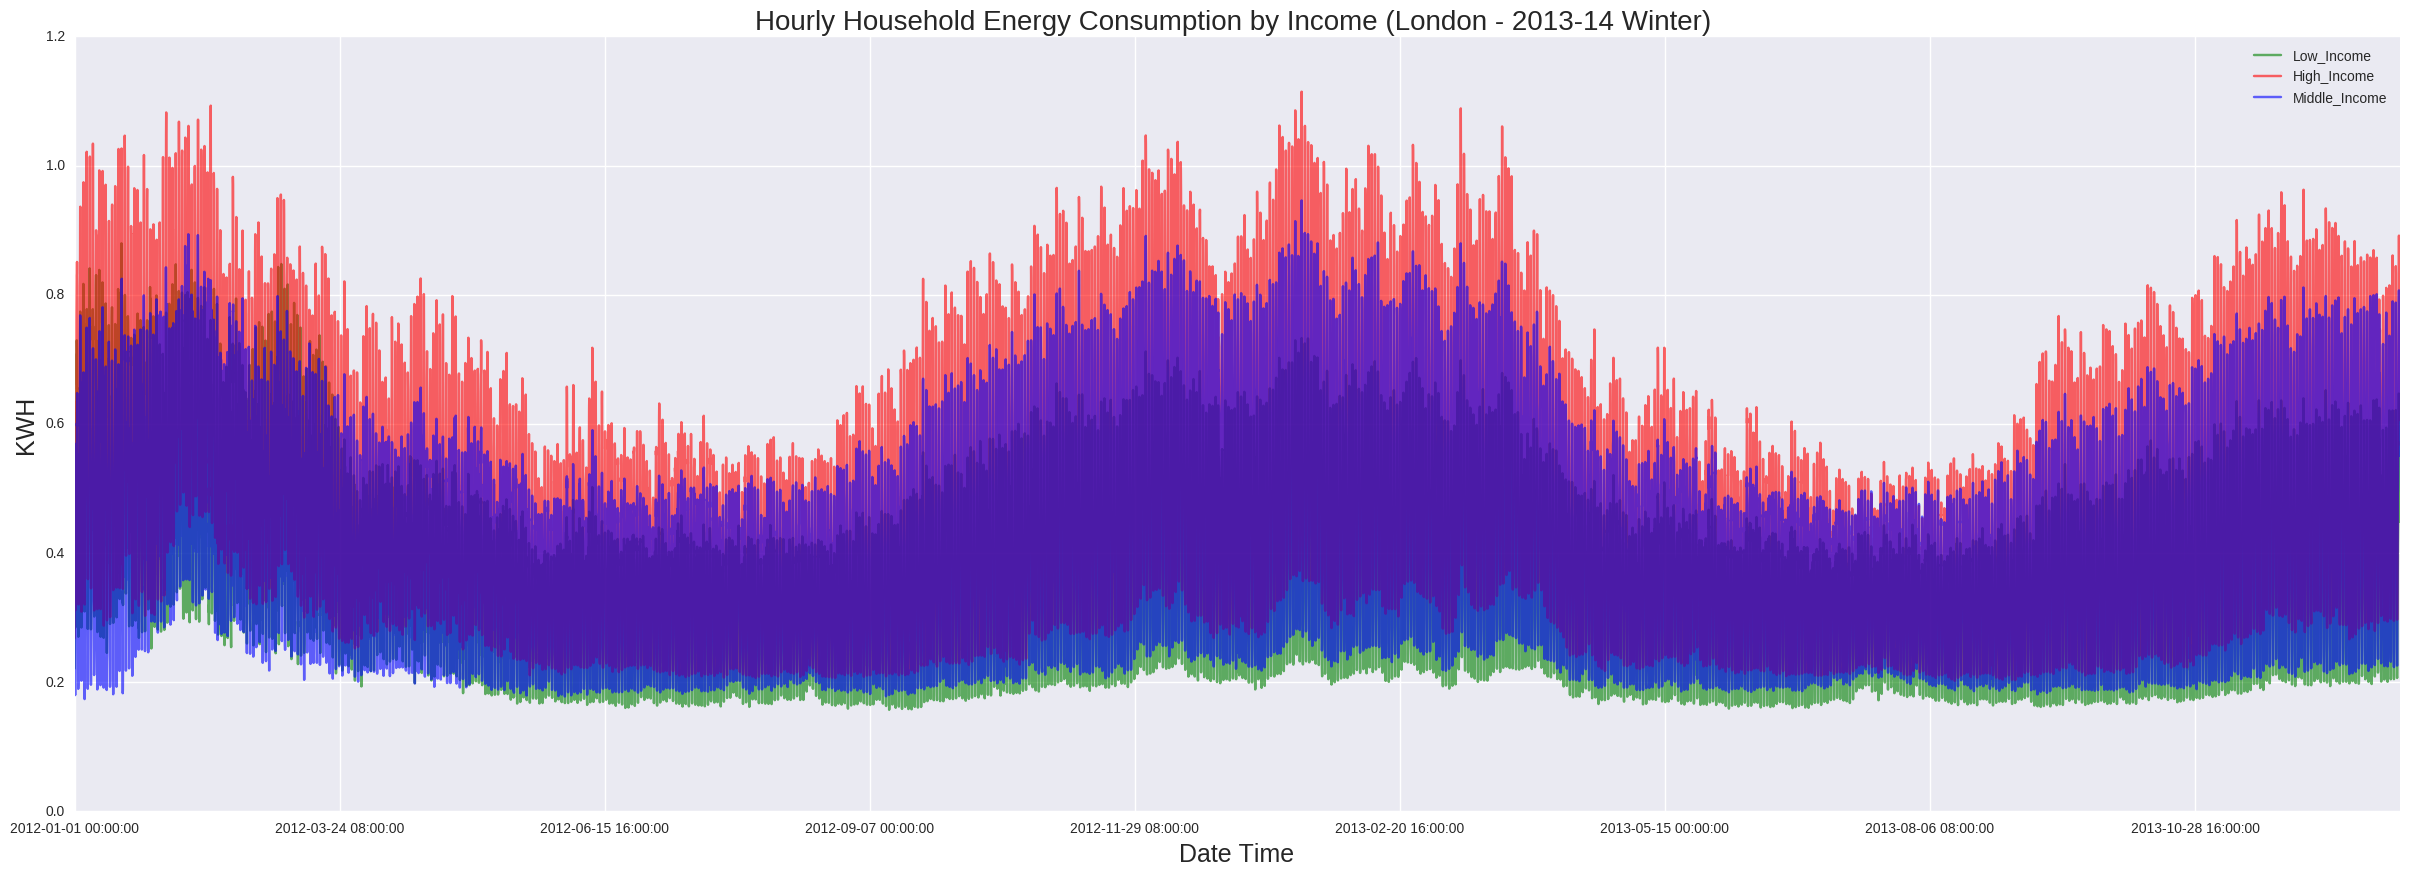

In [69]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy1213.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy1213.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [70]:
final1213 = pd.merge(weather1213, energy1213, on='Datetime')

In [71]:
final2013.head()

,Datetime,Dew_Point_F,Humidity,Temperature_F,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income,Overall
0,2013-01-01 00:00:00,44.6,87.0,48.2,9.2,0.214885,0.284734,0.244850,0.250803
1,2013-01-01 01:00:00,44.6,87.0,48.2,10.4,0.387206,0.499935,0.426540,0.442699
2,2013-01-01 02:00:00,44.6,93.0,46.4,12.7,0.318111,0.429294,0.351710,0.371424
3,2013-01-01 03:00:00,41.0,77.0,46.0,9.2,0.263513,0.367315,0.288224,0.311469
4,2013-01-01 04:00:00,41.0,87.0,44.6,10.4,0.231694,0.324253,0.253951,0.274516


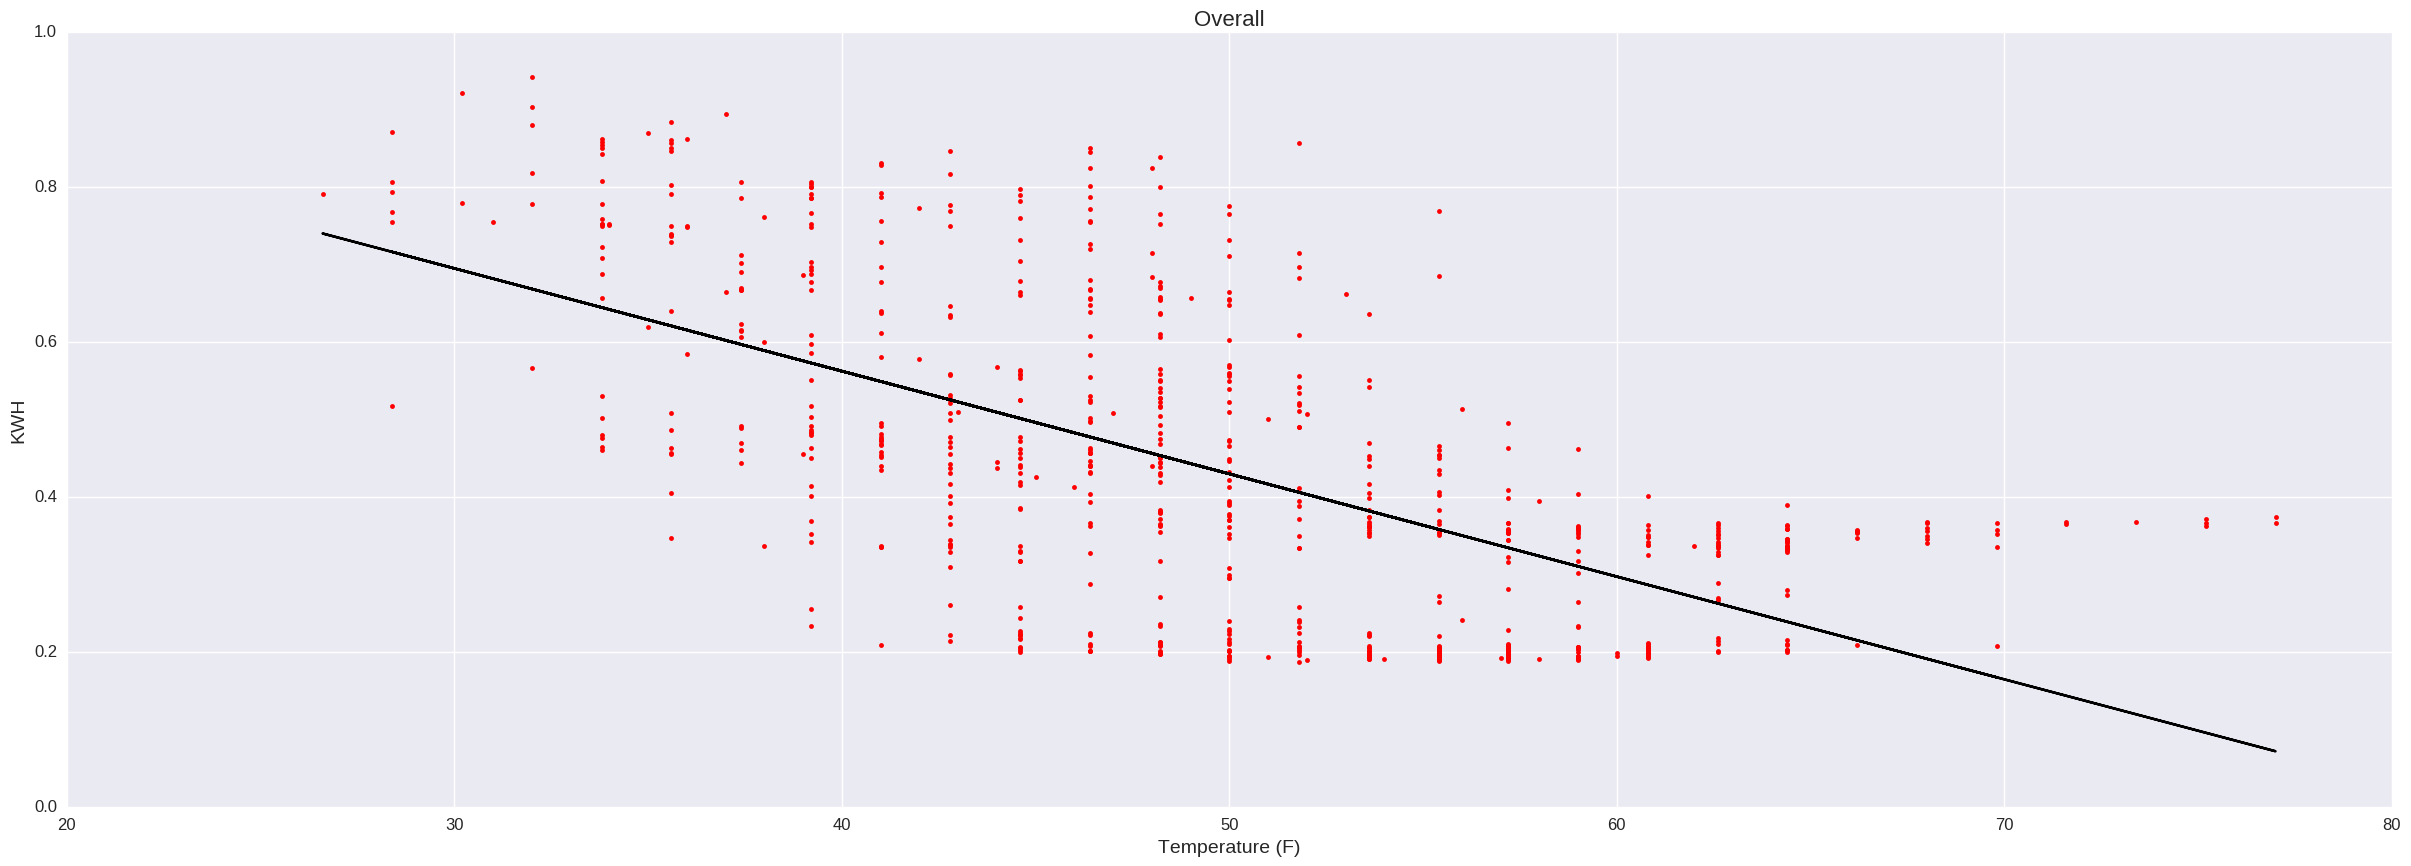

In [72]:
import statsmodels.api as sm
x = np.array(final1213.Temperature_F[17::24])
y = np.array(final1213.Overall[18::24])
lm = sm.OLS(y, sm.add_constant(x)).fit()
ypredict = lm.predict(sm.add_constant(x))
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
        #plot
pl.plot(x, y,'.', color='r')
pl.plot(x, ypredict, 'k')
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.title("Overall", fontsize=16)
pl.ylabel("KWH", fontsize=14)
pl.xlabel("Temperature (F)", fontsize=14)

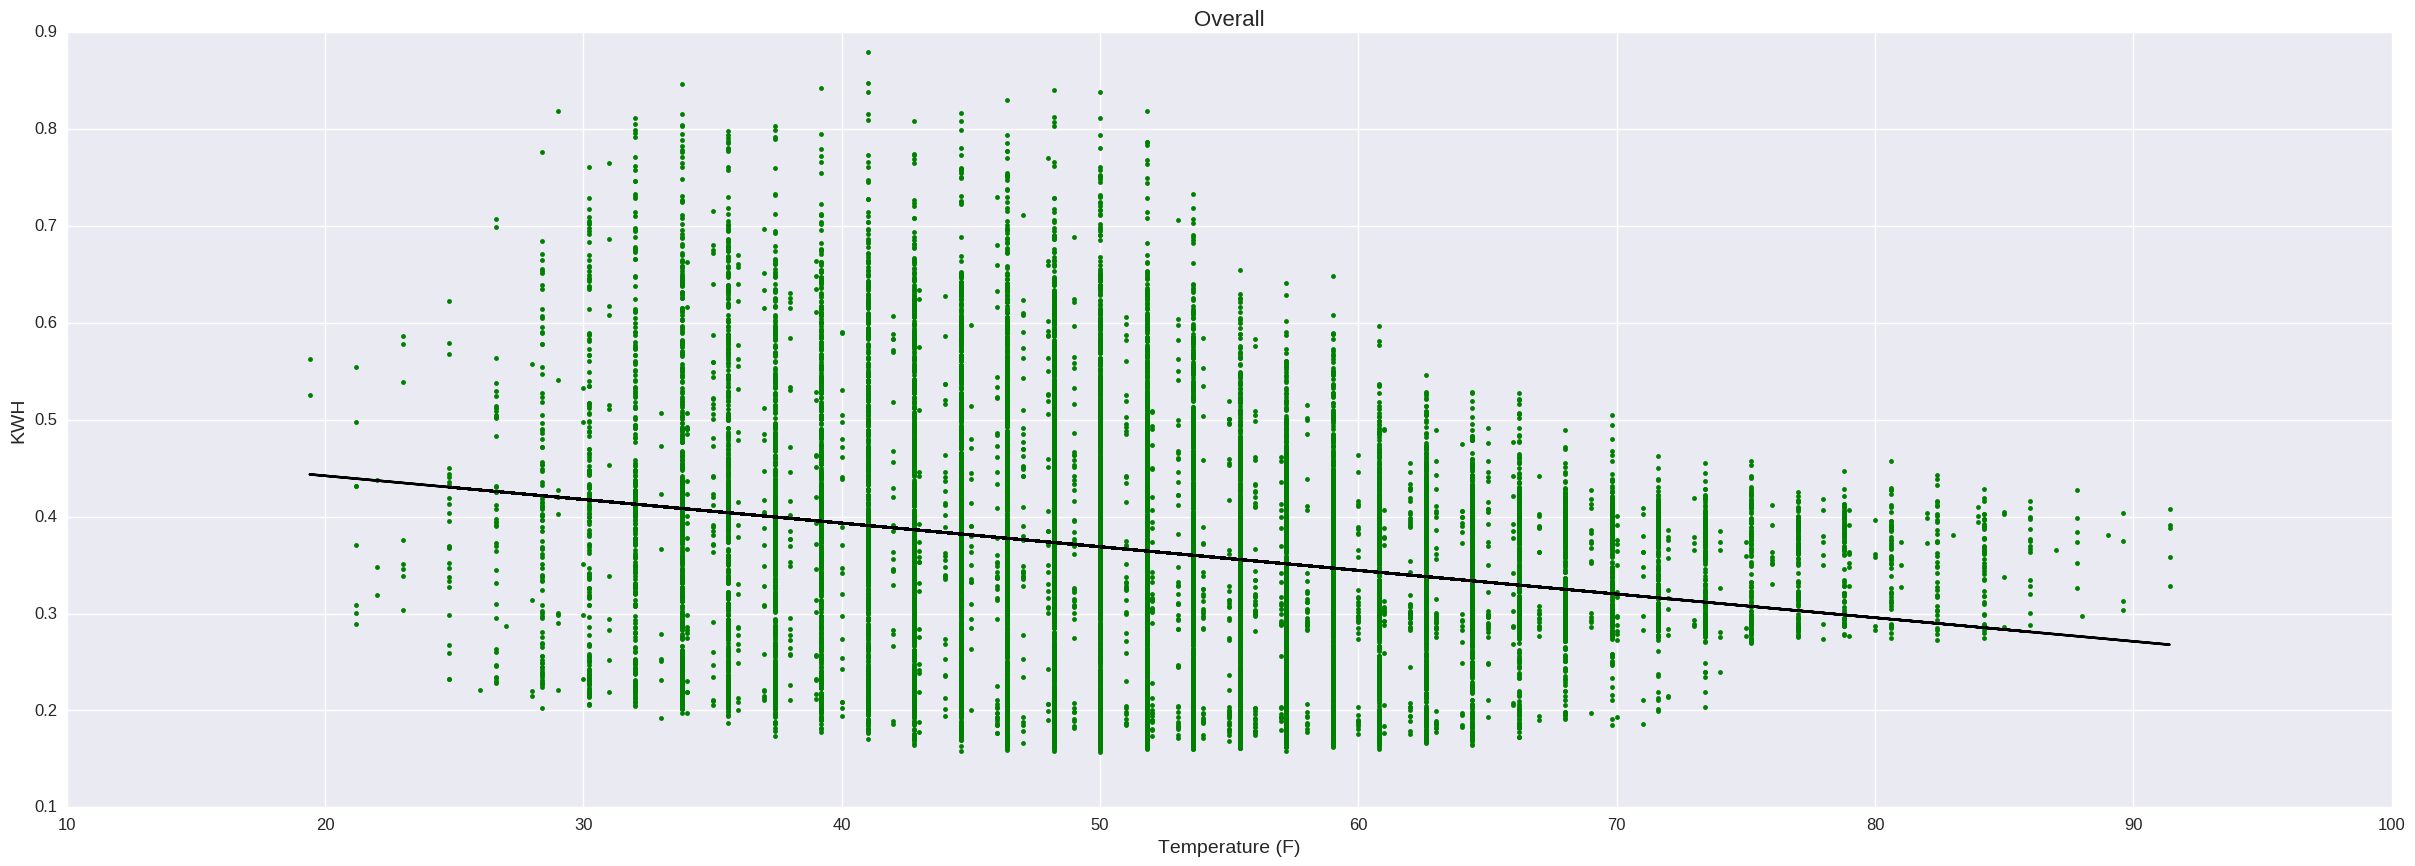

In [73]:
import statsmodels.api as sm
x = np.array(final1213.Temperature_F[:-2])
y = np.array(final1213.Low_Income[2:])
lm = sm.OLS(y, sm.add_constant(x)).fit()
ypredict = lm.predict(sm.add_constant(x))
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
        #plot
pl.plot(x, y,'.', color='g')
pl.plot(x, ypredict, 'k')
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.title("Overall", fontsize=16)
pl.ylabel("KWH", fontsize=14)
pl.xlabel("Temperature (F)", fontsize=14)

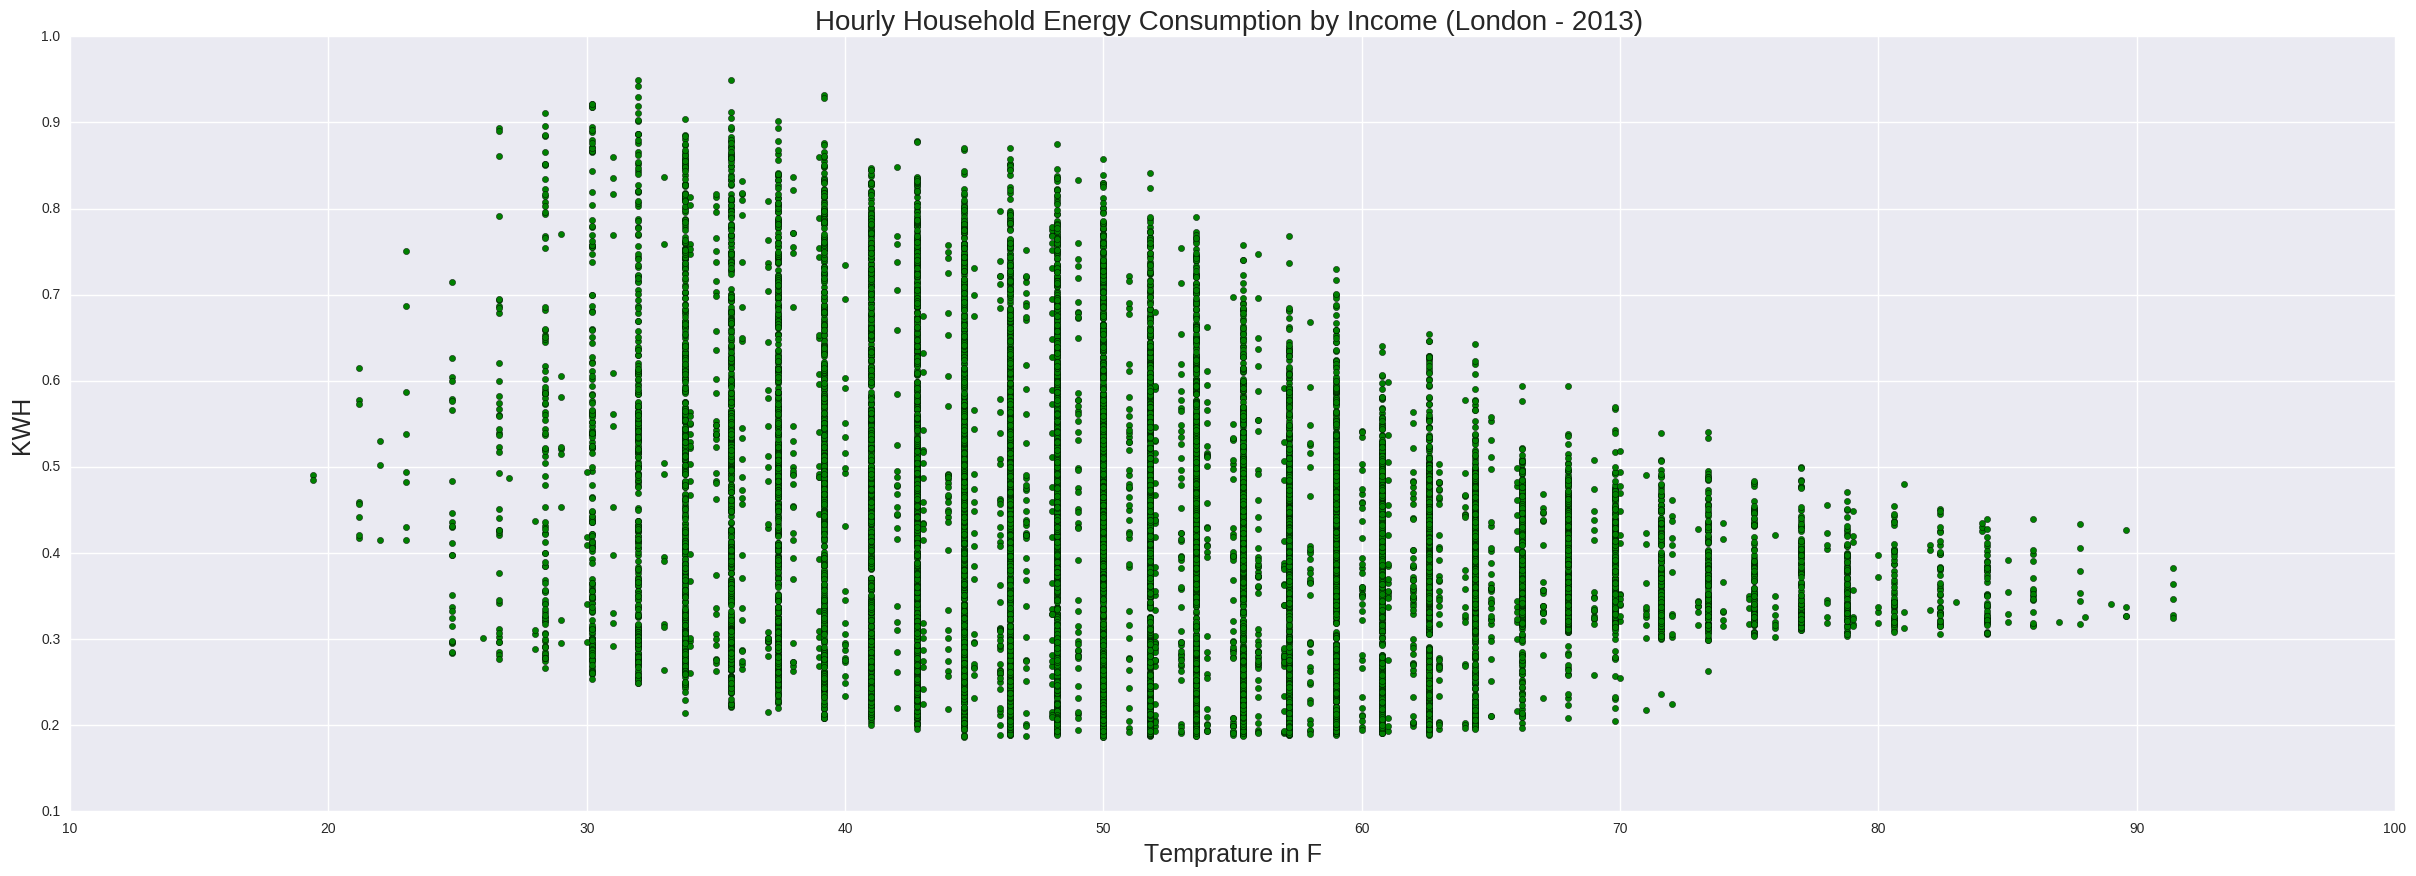

In [74]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Overall', color='Green',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

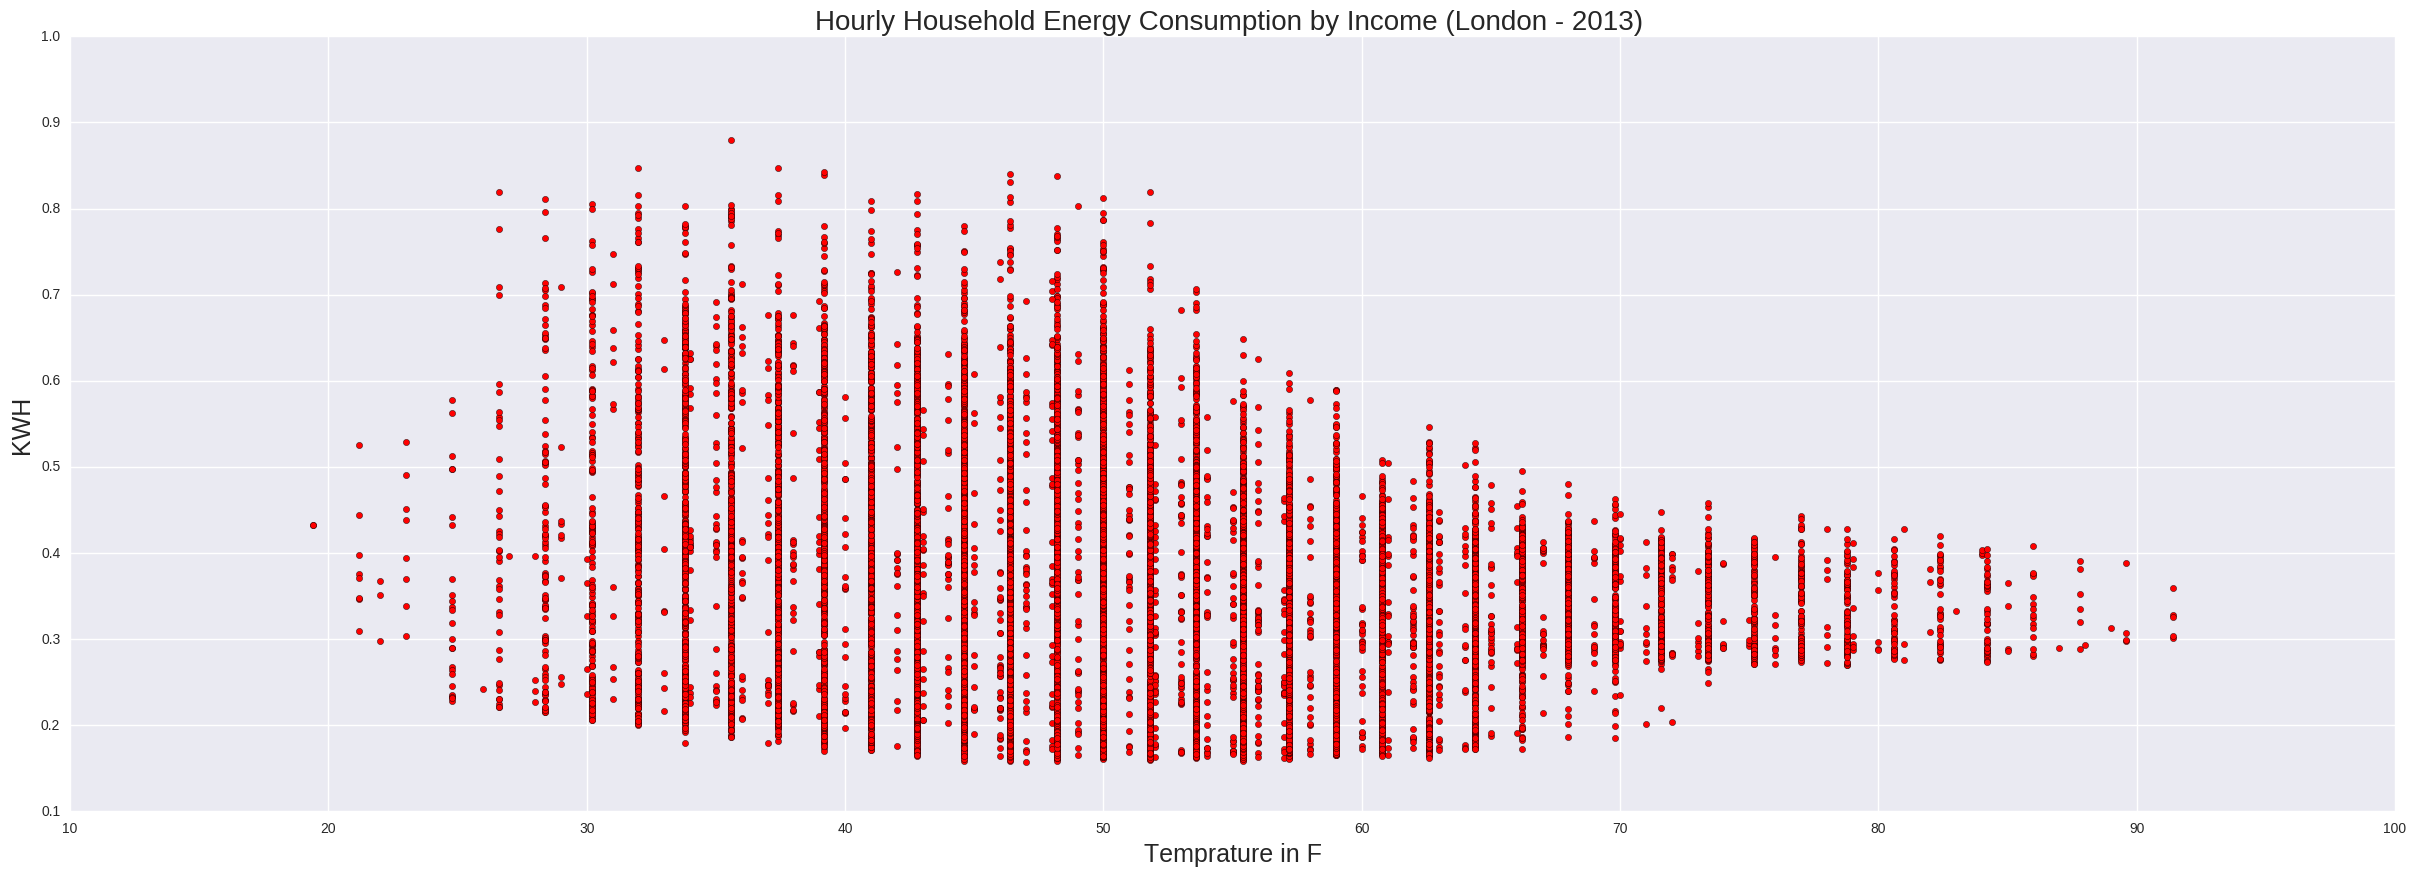

In [75]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Low_Income', color='red',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

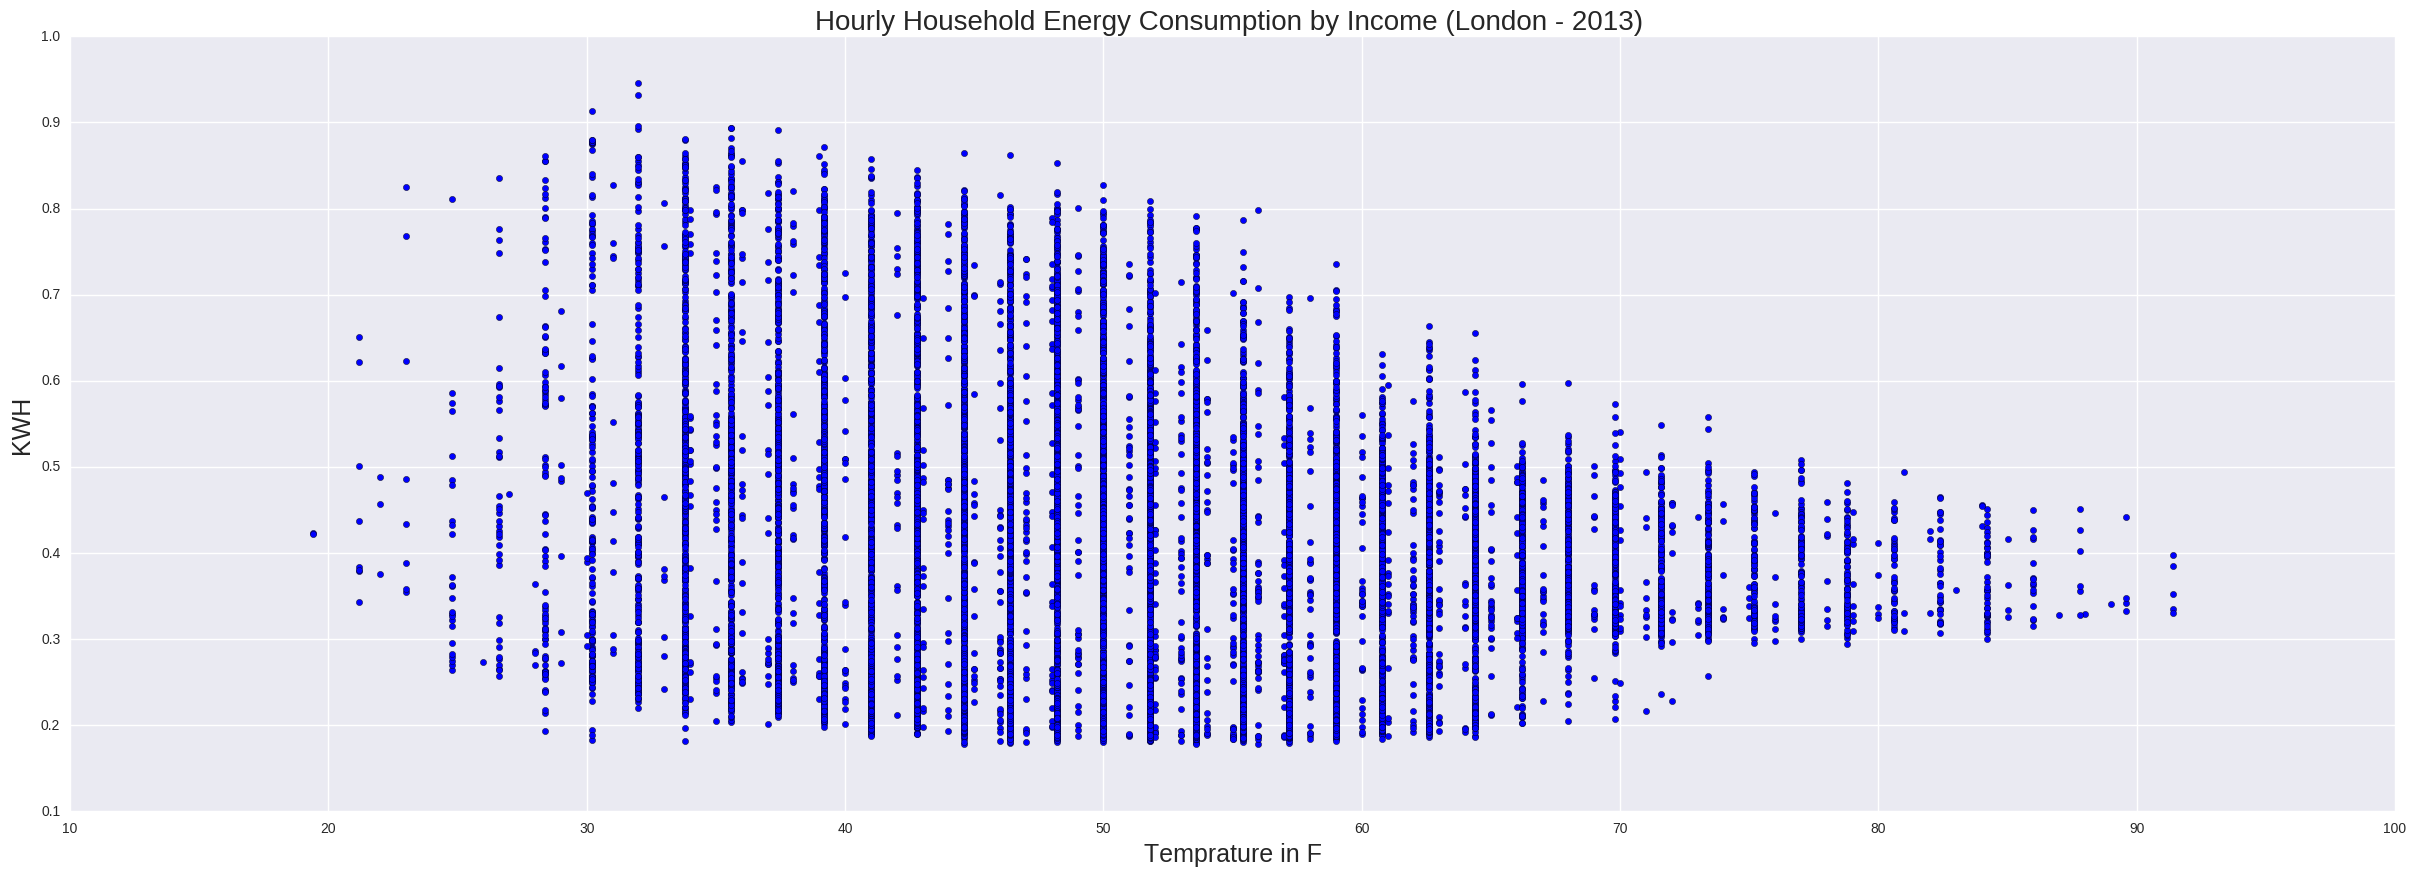

In [76]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='Middle_Income', color='blue',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

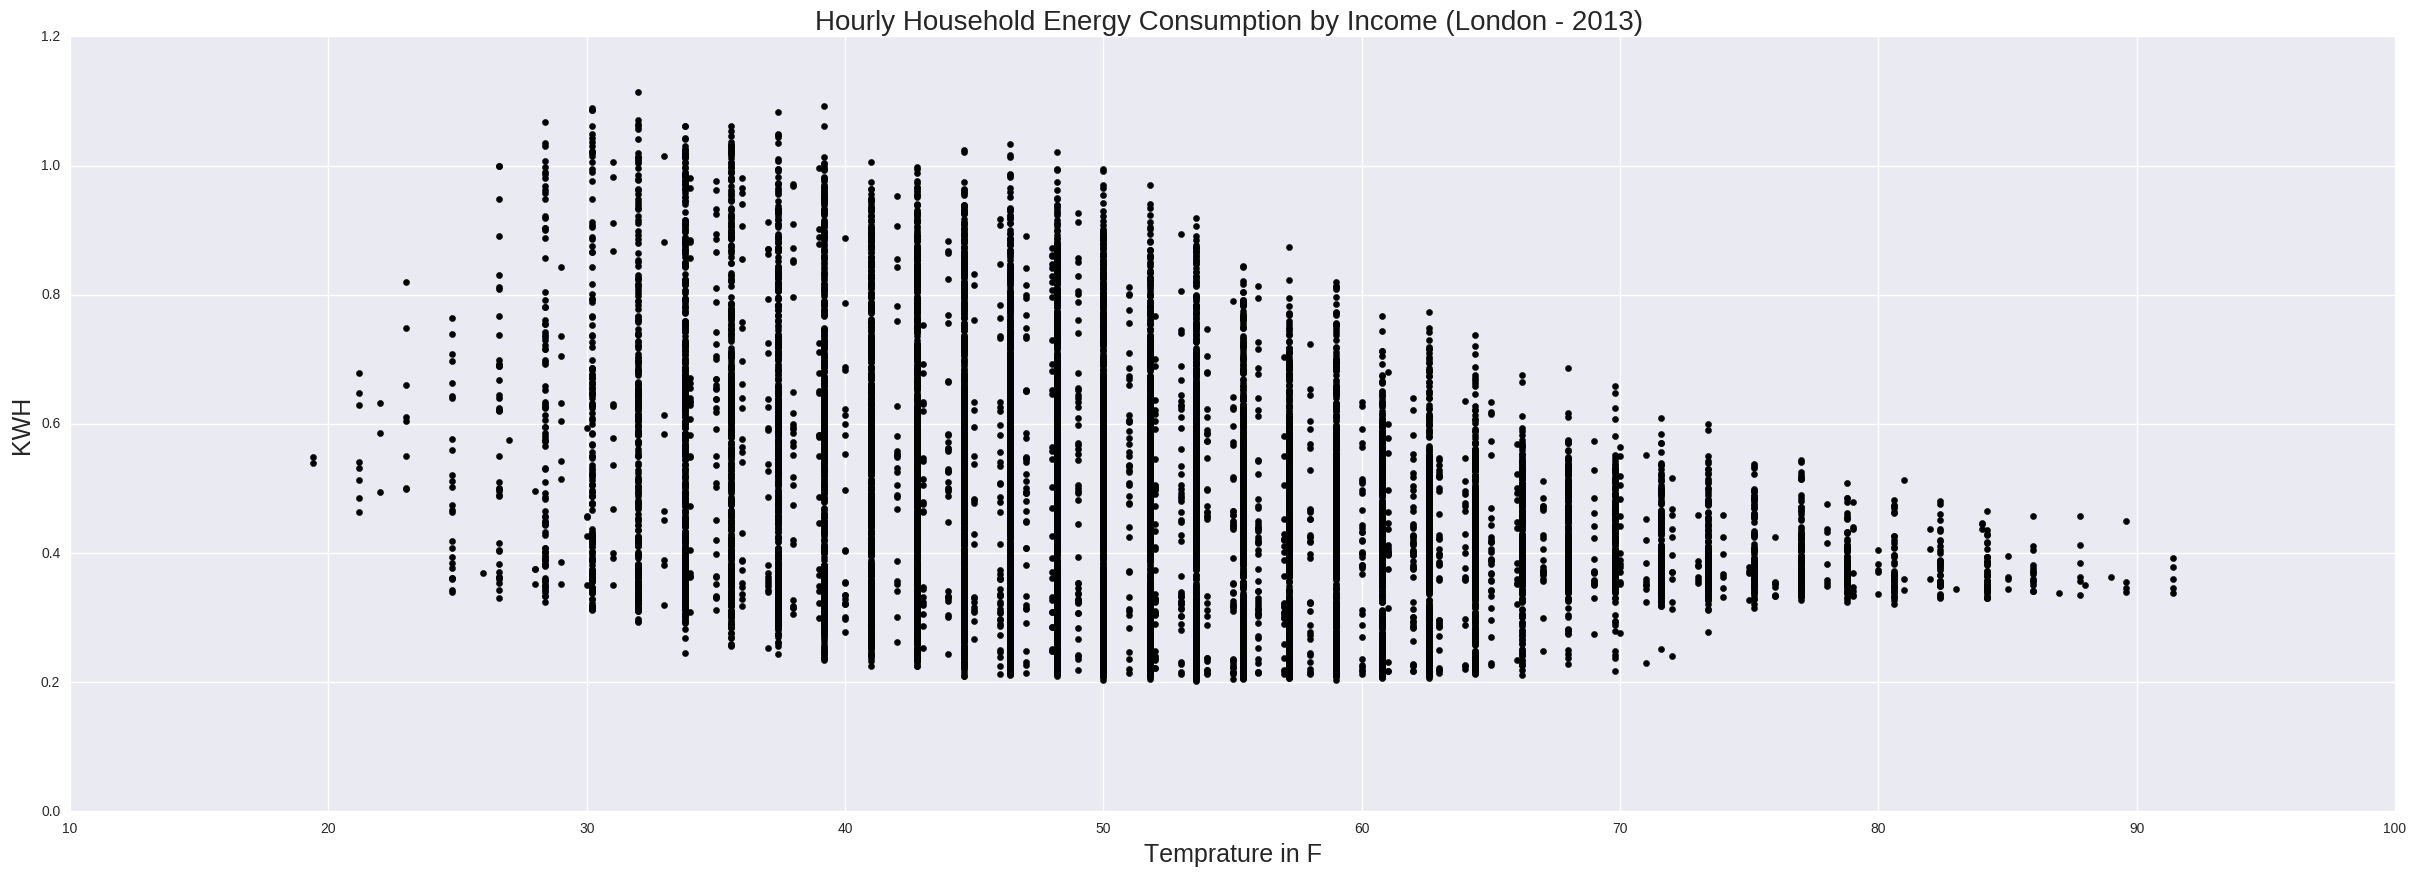

In [77]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
final1213.plot(kind='scatter', x='Temperature_F', y='High_Income', color='black',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

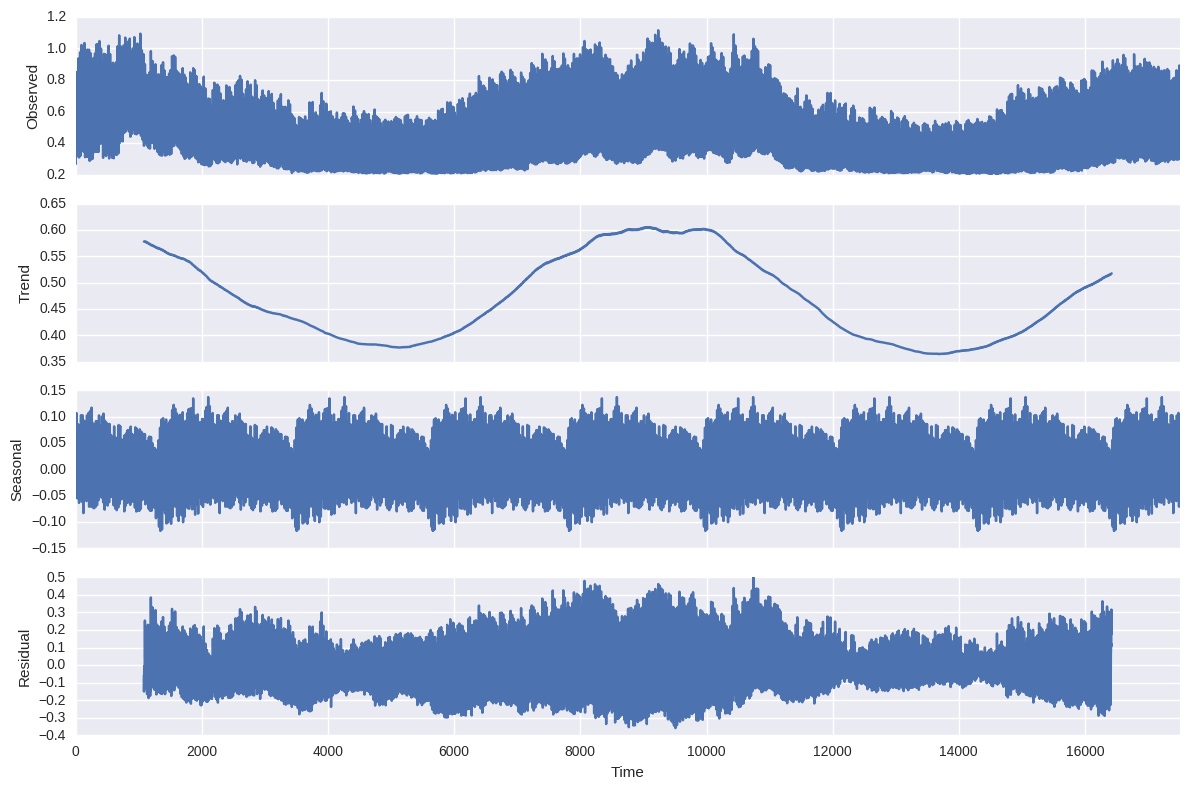

In [87]:
##Seasonal Decomposition of high income energy consumption
data = np.array(final1213.High_Income)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(data, freq = 24*90)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

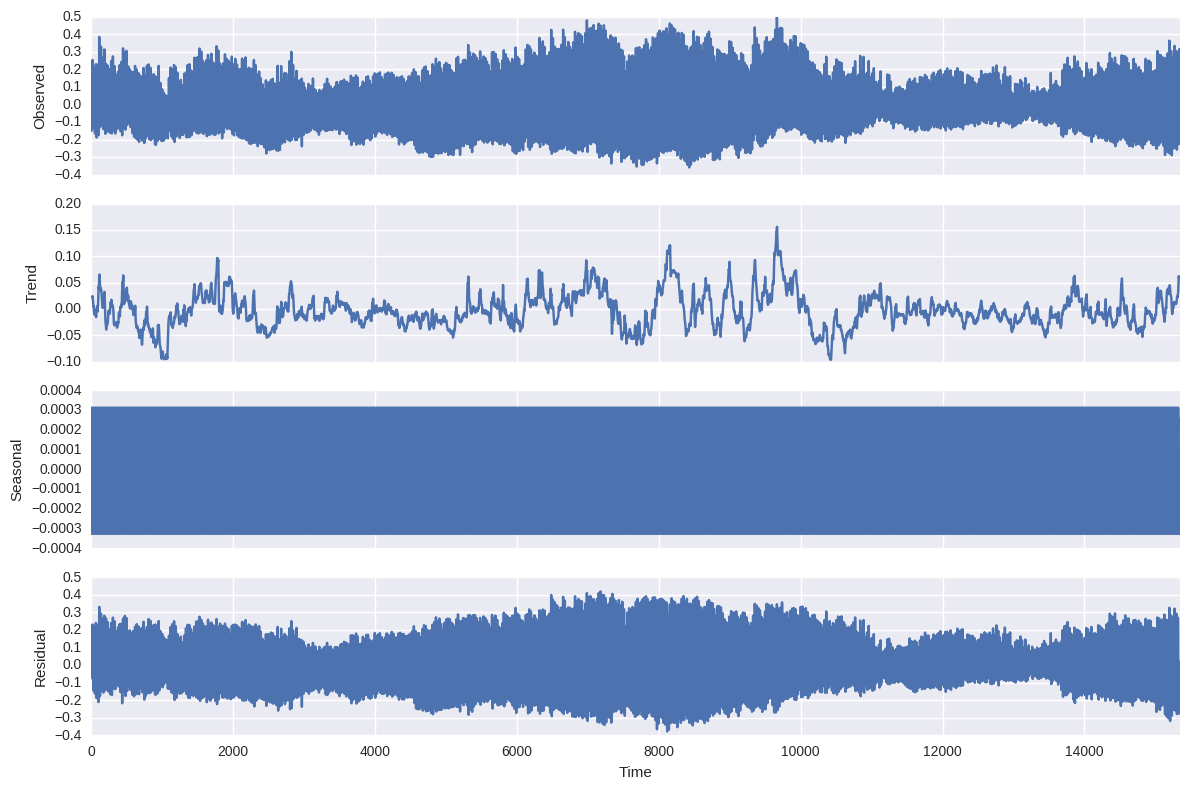

In [90]:
##Seasonal Decomposition of high income energy consumption
data = res.resid[(12*90):-(12*90)]
#Seasonal Decomposition using statsmodels api
res1 = sm.tsa.seasonal_decompose(data, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res1.plot()

In [94]:
data2 = final1213.groupby(['Temperature_F']).mean()
data2.reset_index(inplace=True)
data2.head()

,Temperature_F,Dew_Point_F,Humidity,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income,Overall,HI_residuals
0,19.4,15.800000,86.000000,2.300000,0.432138,0.543331,0.422758,0.487586,0.532540
1,21.2,18.050000,87.750000,3.487500,0.389513,0.561303,0.462054,0.495268,0.592145
2,22.0,19.333333,83.666667,3.500000,0.338869,0.570728,0.440132,0.482308,0.613955
3,23.0,19.125000,84.125000,3.471429,0.414354,0.624183,0.529608,0.548037,0.651655
4,24.8,22.136000,90.000000,3.352632,0.346272,0.506959,0.401671,0.432747,0.513292


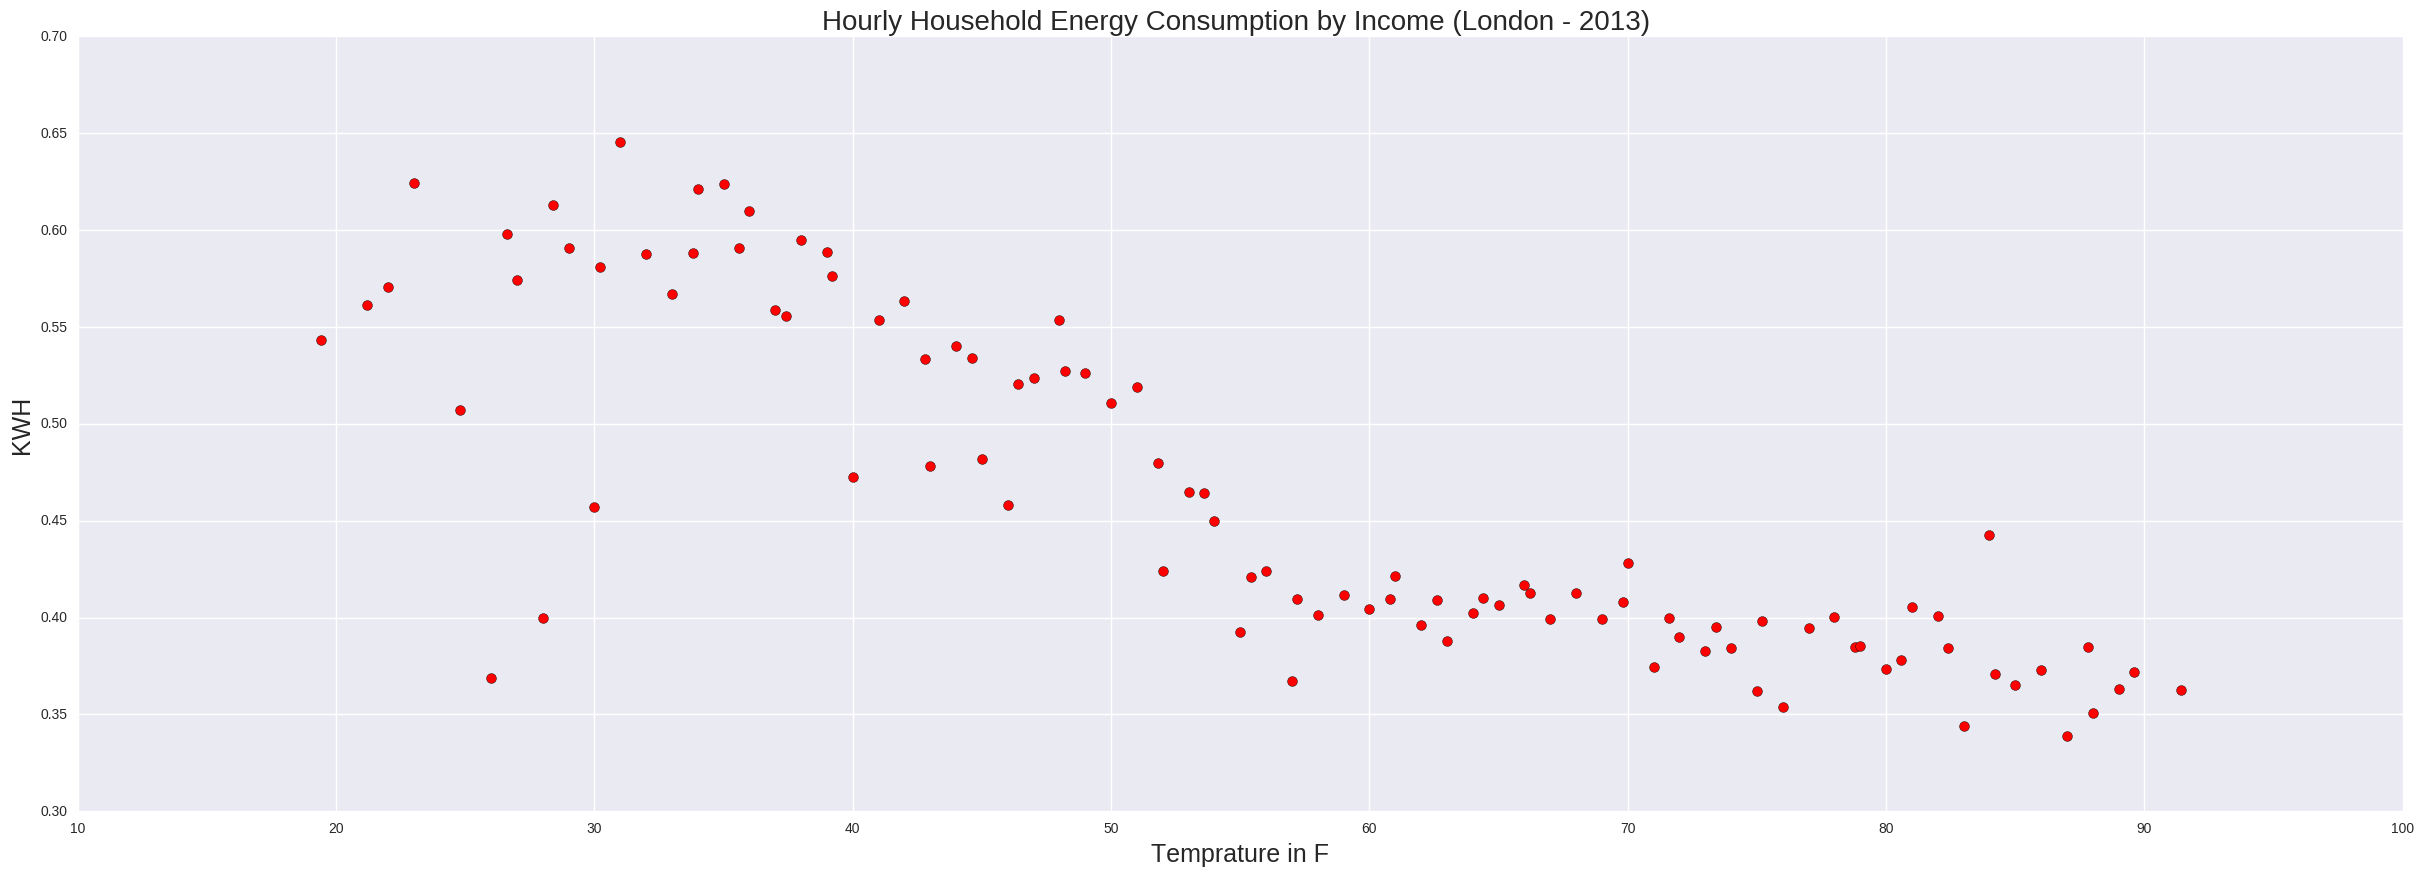

In [98]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

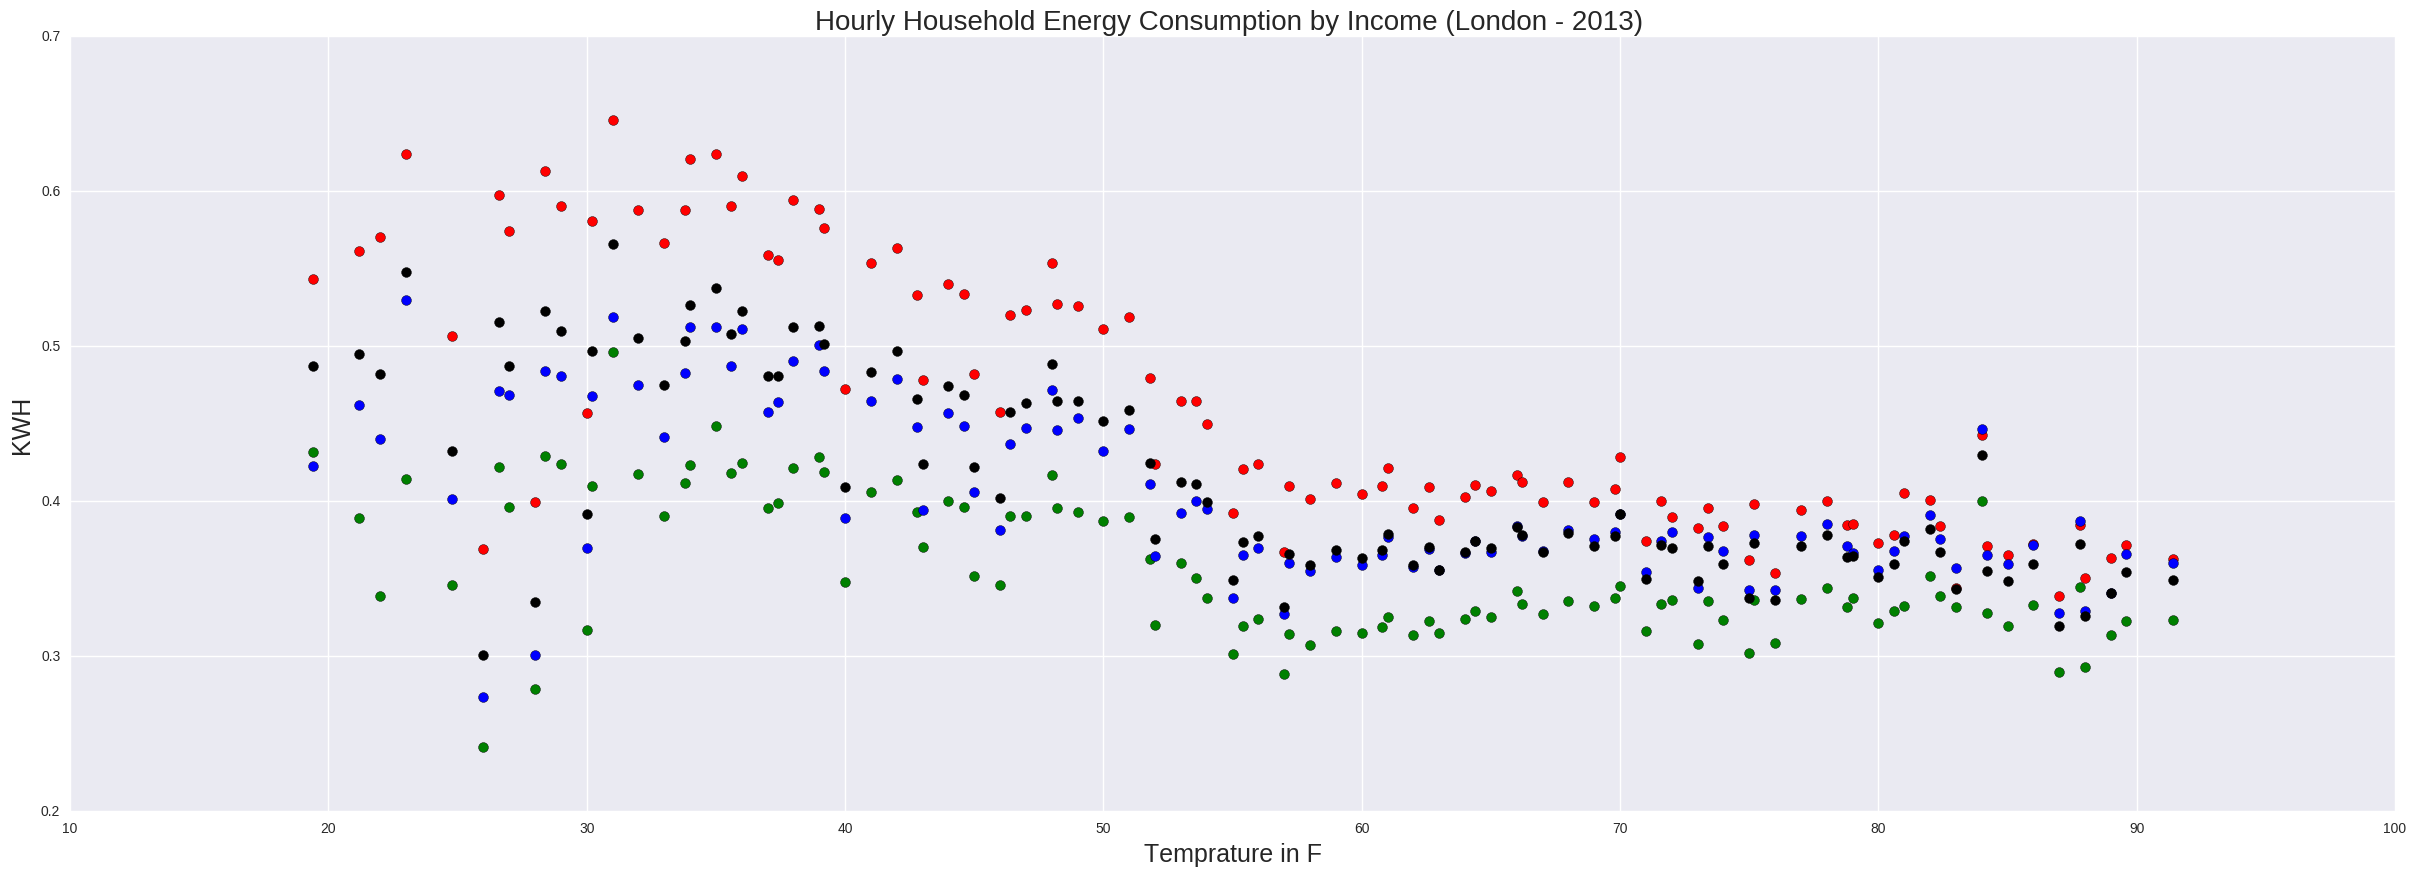

In [99]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
#ax2 = ax1.twinx()
data2.plot(kind='scatter', x='Temperature_F', y='High_Income', color='r',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Low_Income', color='g',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Middle_Income', color='b',s=50, alpha=1, ax=ax1)
data2.plot(kind='scatter', x='Temperature_F', y='Overall', color='k',s=50, alpha=1, ax=ax1)

pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax1.set_xlabel("Temprature in F", fontsize=18)
#pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)